In [1]:
import sys
sys.path.append('../')

from src.m4_generator import M4Generator
from src.error_functions import *
from src.visualization import *
from src.evaluation import evaluate_model
from src.m4_model import M4Model


import numpy as np
import keras
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline

Using TensorFlow backend.


In [2]:
EPOCHS = 1
BATCH_SIZE = 100
LOOKBACK = 48
HORIZON = 48
HIDDEN_LAYER_SIZE = 100
LOSS = smapetf

DESCRIPTION = 'ERR(smapetf)_with_dropout0.3'
model_name = f'LSTM_E{EPOCHS}_B{BATCH_SIZE}_H{HIDDEN_LAYER_SIZE}_L{LOOKBACK}_DESC_{DESCRIPTION}'

print(model_name)

gen = M4Generator("../Dataset/Train/Hourly-train.csv", "../Dataset/Test/Hourly-test.csv",
                  LOOKBACK, HORIZON, BATCH_SIZE)

model = M4Model(hidden_layer_size=HIDDEN_LAYER_SIZE, batch_size=BATCH_SIZE, lookback=LOOKBACK, 
        horizon=HORIZON, learning_rate=0.001, loss = smapetf, dropout_ratio = 0.3)

#hist = model.train(gen, epochs=EPOCHS)

#model.save(f'../models/{model_name}.json', f'../models/{model_name}.h5')

LSTM_E200_B100_H100_L48_DESC_ERR(smapetf)_with_dropout0.3


In [10]:
DESCRIPTION = 'ERR(smapetf)_with_dropout0.3'
model_name = f'LSTM_E{EPOCHS}_B{BATCH_SIZE}_H{HIDDEN_LAYER_SIZE}_L{LOOKBACK}_DESC_{DESCRIPTION}'
print(model_name)
model.save(f'../models/{model_name}.json', f'../models/{model_name}.h5')

LSTM_E200_B50_H100_L48_DESC_ERR(smapetf)_with_dropout0.3
Saved model to disk


In [3]:

#=================== Evaluate Model
#model = M4Model(batch_size=BATCH_SIZE, learning_rate=0.001, loss = smapetf,)
model.load('../models/LSTM_E300_B100_H200_L48_ERRmae_D0.5.json','../models/LSTM_E200_B200_H200_L48_ERRmae_D0.5.h5')

#model.compile()
#hist = model.train(gen, epochs=EPOCHS)

#model = M4Model()
#model.load('../models/LSTM_E500_B50_H200_L48.json','../models/LSTM_E500_B50_H200_L48.h5')

#gen = M4Generator("../Dataset/Train/Hourly-train.csv", "../Dataset/Test/Hourly-test.csv",
#                  48, 48, 50)

train_x, train_y, test_x, test_y = gen.get_data()

train_error = evaluate_model(model, train_x, train_y, smapetf)
print(train_error)

test_error = evaluate_model(model, test_x, test_y, smapetf)
print(test_error)


Loaded model from disk
10.884051808936059
53.16434348816514


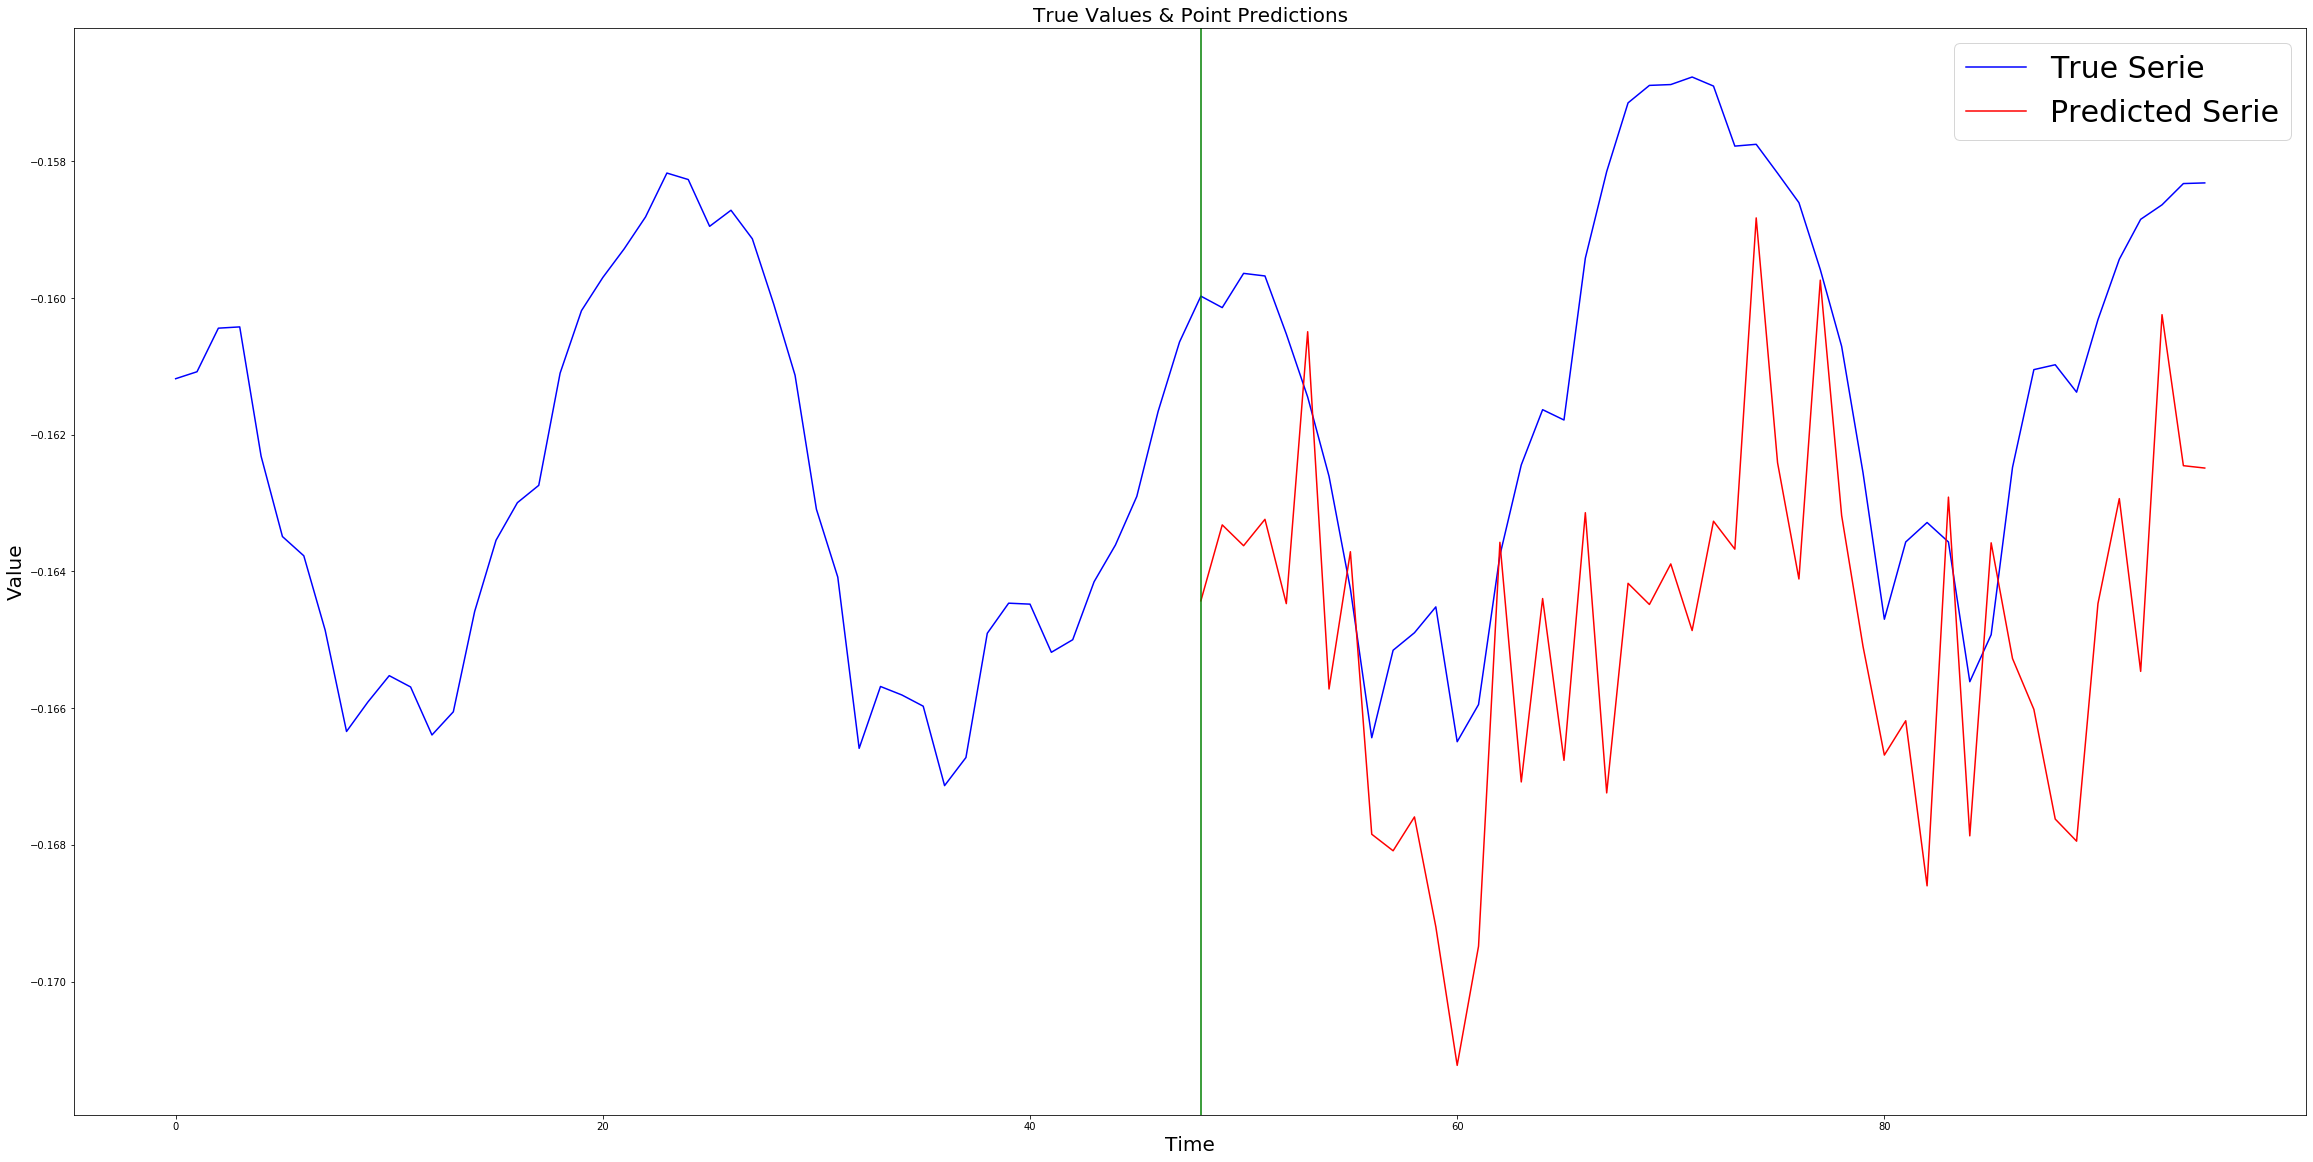

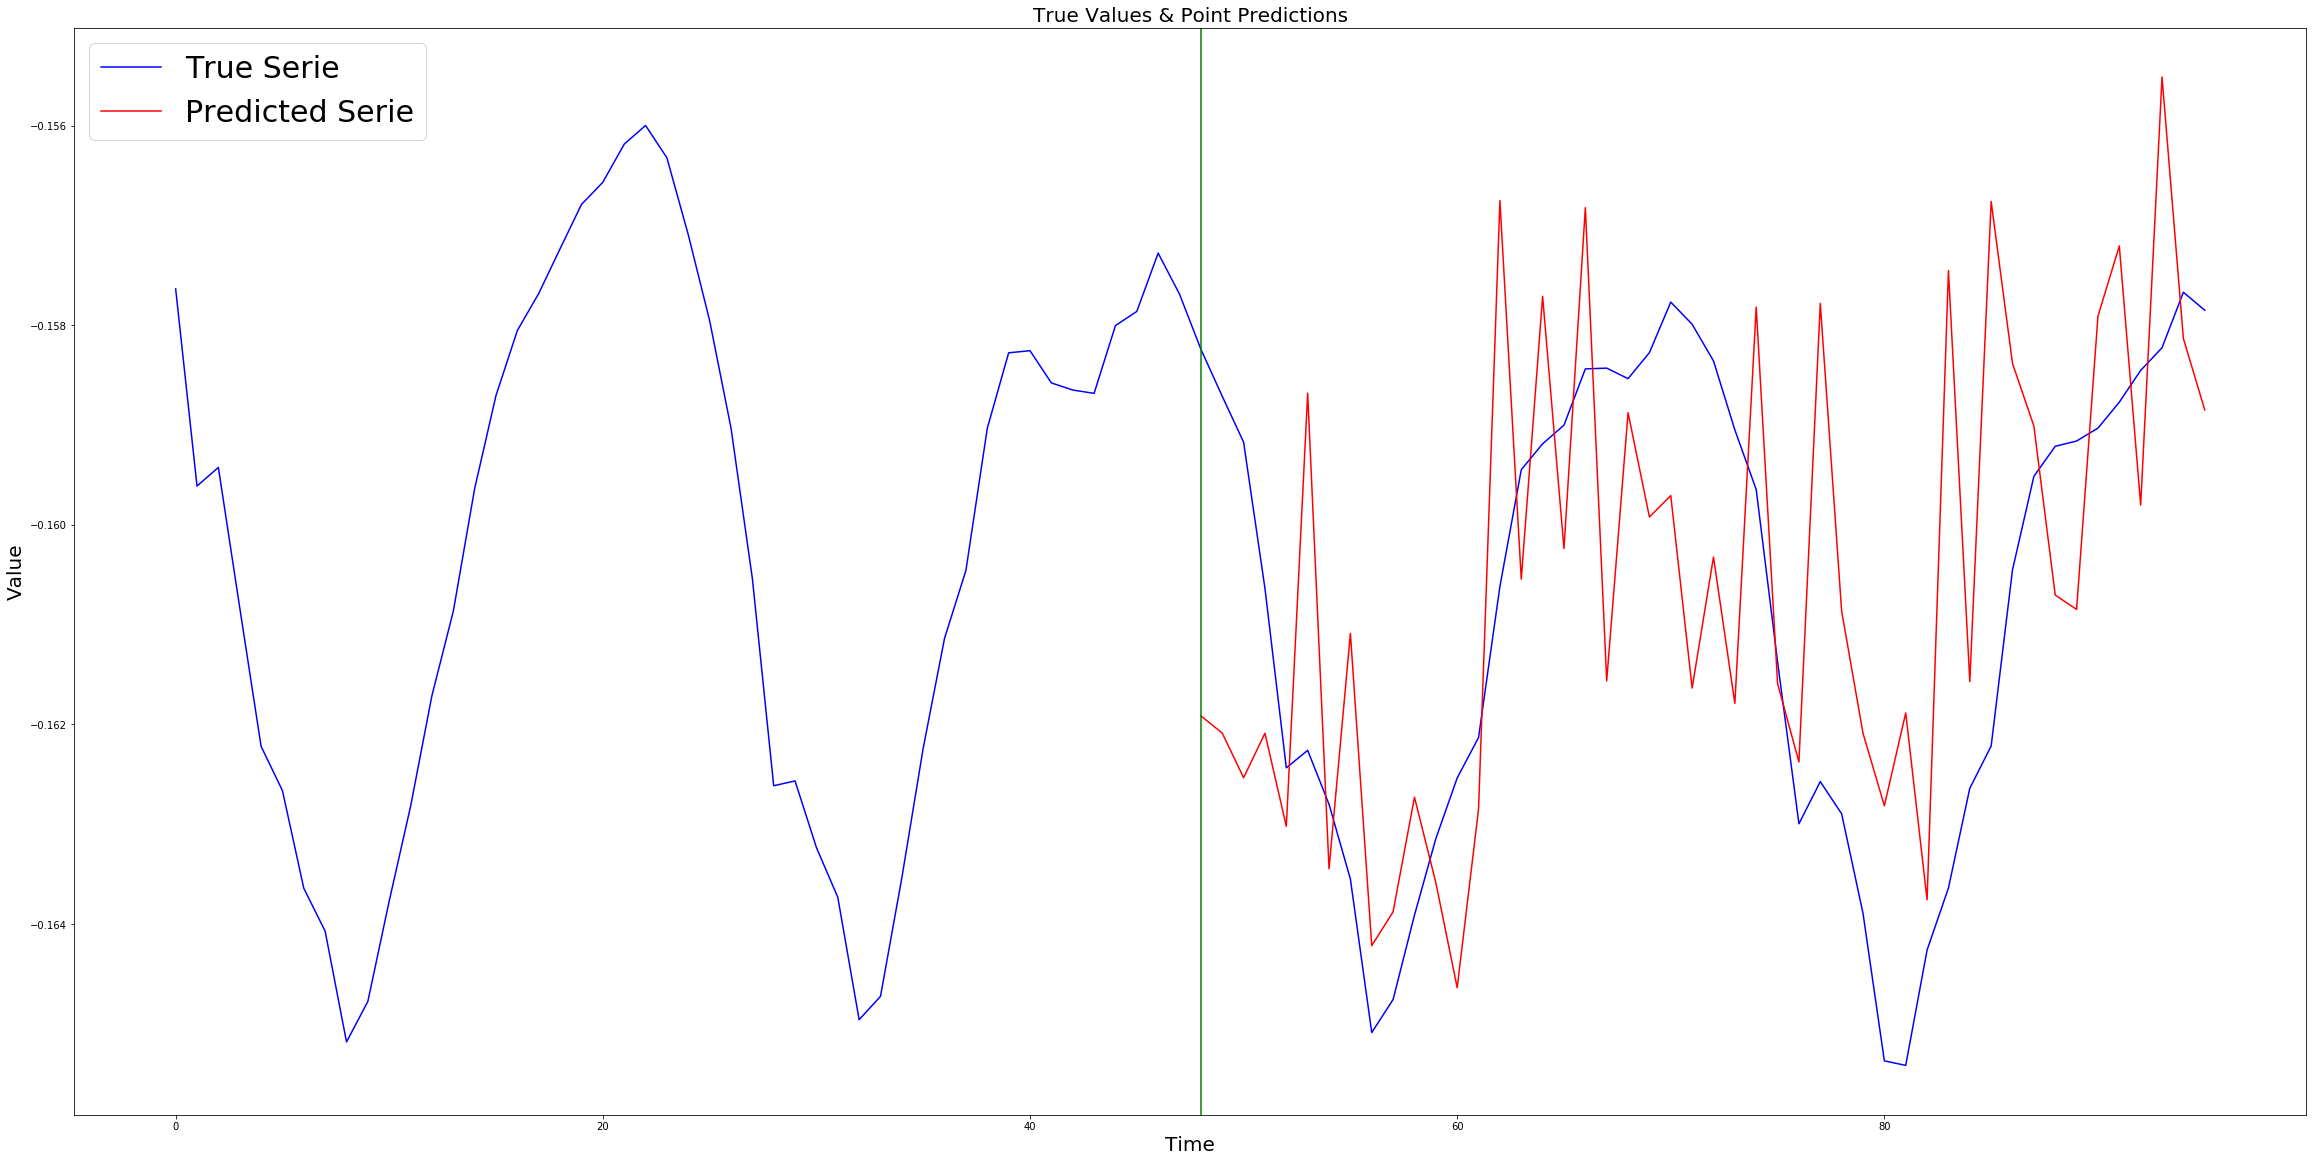

In [6]:
IDX = 0
#============ Predict Train
predictedY = model.predict(train_x[:BATCH_SIZE,:].reshape(BATCH_SIZE, LOOKBACK, 1))

#plot_series(train_x, train_y, predictedY, series_num=10)
plot_serie_and_prediction(train_x, train_y, predictedY, serie_indx=IDX)

#============ Predict Test
predictedY = model.predict(test_x[:BATCH_SIZE,:].reshape(BATCH_SIZE, LOOKBACK, 1))

#plot_series(test_x, test_y, predictedY, series_num=10)
plot_serie_and_prediction(test_x, test_y, predictedY, serie_indx=IDX)

In [31]:
from utils import exponential_smoothing

gen = M4Generator("../Dataset/Train/Hourly-train.csv", "../Dataset/Test/Hourly-test.csv",
                  640, HORIZON, BATCH_SIZE)
train_x, train_y, test_x, test_y = gen.get_data()

yPred =  np.empty(shape=[0, HORIZON])
for data in test_x:
    pred = exponential_smoothing(data)
    yPred = np.vstack((yPred, pred))

print(yPred.shape)

/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3

/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3

(414, 48)


tf.Tensor(86.17036794357033, shape=(), dtype=float64)


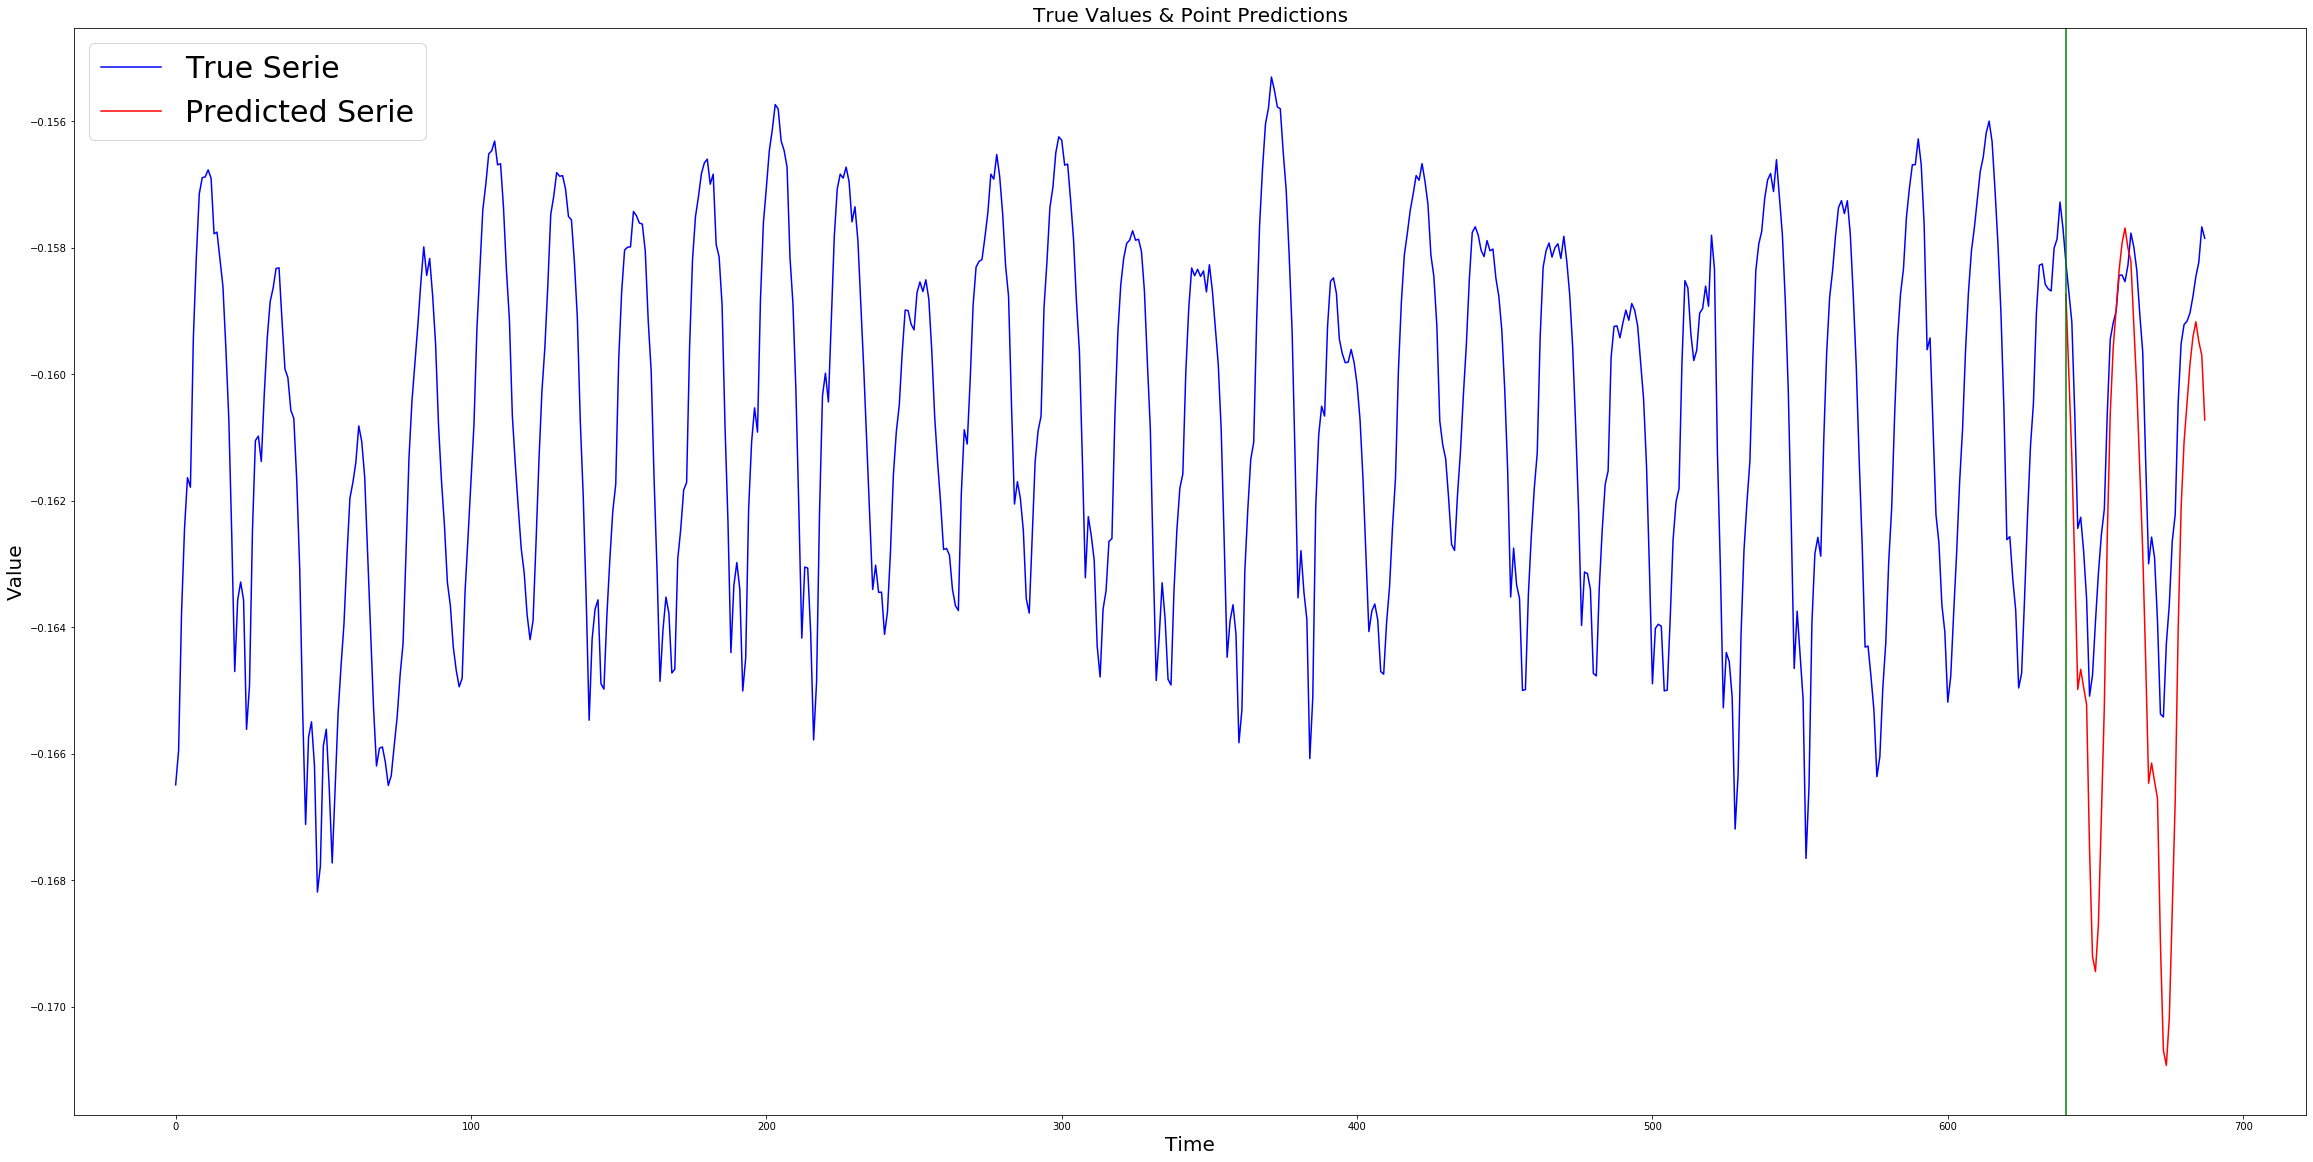

In [33]:
IDX = 0
print( smapetf(test_y, yPred))
plot_serie_and_prediction(test_x, test_y, yPred, serie_indx=IDX)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()

model.add(LSTM(1, batch_input_shape=(100, 2,1), return_sequences=True, activation='tanh',
              kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.2)))

model.layers[0].name



'lstm_7'